In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',200)

## Problem 1 
Nasze puste wartośći istniejące w zbiorze danych narzucają na kolumny object, ponieważ nan jest domyślnie dla biblioteki pandas widoczne jako float. Także tam gdzie chciałbym int czy boolean robi nam krzaki przynajmniej to co do tej pory udało mi się przjerzeć.
Z odpowiednio dodanymi castoawaniem typu i zamianą danych (i ich zachowaniem) pustych inaczej określone niż domyślnie udało mi się z warnigna zlikiwodać kolumne 7 11 i 12.
## Problem 2 
Dla kolumny 8 Explicti możliwość zmiany nan na domyślnie 0 kolumna boolean. Nie sprawdzałem jeszcze na ile nam to komplikuje w sesie jaką wartość niesie ze sobą kolmuna 8. Zamaina Explict nan na -1.
## Warning
Zlikwidowane wszystkie Warningi poza 8 ale to decyzja patrz problem 2. Kwestia czy wartości zostawiamy float czy może jednak inny typ im castujemy i coś innego niż zero. Zmiana aby pozbyć się warninga i narzucic flota dla 19 wierszy

# Wczytywanie Danych

In [2]:
df_country_iso = pd.read_csv(r'.\Country_ISO\countries_codes_and_coordinates.csv') # wczytanie i stworznie do pracy kolmuny z oznaczniem iso krajów do plotly
df_country_iso = df_country_iso.replace('"','', regex=True)  #usunięcie nadmienrgo znaku

In [3]:
kraj = list(df_country_iso['Country']) #wyciągnięcie krajów z iso
kraj
iso = list(df_country_iso['Alpha-3 code']) #wyciągnięcie skrótów krajów z iso
iso
dict = {}
iso = [x.strip(' ') for x in iso] # usnięcie spacji ze skrótów kodów
for i,j in zip(kraj,iso): # tworznie słownika na bazie którego zostanie zapełniona kolumna iso_alpha z df
    dict.setdefault(i,j)


In [79]:
df_orginal.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y 

In [4]:
df_orginal = pd.read_csv('./Orginal_database_from_Kaggle/Final database.csv',dtype={'Track_number':pd.Int8Dtype(),'Tracks_in_album':pd.Int64Dtype()},na_values=('n-a','NA'),sep= ',')
# wczytanie orginalnego pliku
# pd.Int8Dtype() castuje integer for nan values from panda 


C:\Users\Data\AppData\Local\Temp\ipykernel_118444\3251920356.py:1: DtypeWarning: Columns (8,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orginal = pd.read_csv('./Orginal_database_from_Kaggle/Final database.csv',dtype={'Track_number':pd.Int8Dtype(),'Tracks_in_album':pd.Int64Dtype()},na_values=('n-a','NA'),sep= ',')


In [5]:
columns = list(df_orginal.columns) # lista nazw wszystkich kolumn
columns_to_check = [13,14,15,16,17,18,19,20,21,22,23,24,25] # lista indesków interesujących nas kolumn z warninga

In [6]:
def swich(filed):  # funncjka aby dokonac podmiany wartośći do wykrzystania przy parametrze converters
    if filed == 'n\x07':
        return  0
    else:
        return float(filed) # nadanie float i tym samym zapewnnie kolumnie odpowiedniego typu
    

In [7]:
columns_to_change = {} # slownik złożony z  columns_to_check i funkcji swich
for i,j in enumerate(columns):
        if i in columns_to_check:
            columns_to_change[j] = swich

In [8]:
df = pd.read_csv('./Orginal_database_from_Kaggle/Final database.csv',dtype={'Track_number':pd.Int8Dtype(),'Tracks_in_album':pd.Int64Dtype()},na_values=('n-a','NA'),sep= ',',converters=columns_to_change)
# pd.Int8Dtype() castuje integer for nan values from panda

C:\Users\Data\AppData\Local\Temp\ipykernel_118444\1933048488.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Orginal_database_from_Kaggle/Final database.csv',dtype={'Track_number':pd.Int8Dtype(),'Tracks_in_album':pd.Int64Dtype()},na_values=('n-a','NA'),sep= ',',converters=columns_to_change)


In [9]:
df['Release_date'] = pd.to_datetime(df['Release_date']) # zmiana typu kolmuny na date

In [10]:
df.rename(columns = {'album':'album_T_F','country': 'country_T_F'}, inplace=True) # zmiana dwóch nazw kolumn na potrzby wczytania do bazy danych oraz aby nie powtarzały sie nazwy
df['Explicit'] = df['Explicit'].fillna(value=-1)   # uzupelnienie na with -1


In [11]:
df['iso_alpha'] = df['Country'] #dodanie kolmuny iso_alpha z wartościami Country aby dokonać podmiany na trzy literowen zonaczenie

df.replace({"iso_alpha": dict},inplace=True) # podmiana wartosci iso_alpha na ich odpowiednik 3 literowy potrzbne do wykrzystania w plotly do wyświetlania potrzbenych krajów

In [69]:
fig = px.colors.qualitative.swatches()
#fig.show() #kolory do wyboru dla zmienej dyskretnej

In [70]:
fig = px.colors.sequential.swatches_continuous()
#fig.show() #kolory do wyboru dla zmienej ciągłej

In [14]:
df

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album_T_F,compilation,single,bolero,boy band,country_T_F,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster,iso_alpha
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.470,1.0,0.3360,0.3230,0.000000,0.0676,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global,Global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.470,1.0,0.3360,0.3230,0.000000,0.0676,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic,USA
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.470,1.0,0.3360,0.3230,0.000000,0.0676,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking,ARG
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.470,1.0,0.3360,0.3230,0.000000,0.0676,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english

In [15]:
y = df['Popularity_ss']
x = df['Artist_followers_ss']

KeyError: 'Popularity_ss'

In [71]:
sns.jointplot(x="x", y="y", data=pd.DataFrame({"x":x,"y":y}));

NameError: name 'x' is not defined

In [72]:
ssp = MinMaxScaler()
ssaf = MinMaxScaler()
x_p = ssp.fit(df[['Popularity']])
y_af = ssaf.fit(df[['Artist_followers']])
df[['Popularity_ss']] = ssp.transform(df[['Popularity']])
df[['Artist_followers_ss']] = ssaf.transform(df[['Artist_followers']])

In [73]:
sns.pairplot(pd.DataFrame({"x":x,"y":y}));

NameError: name 'x' is not defined

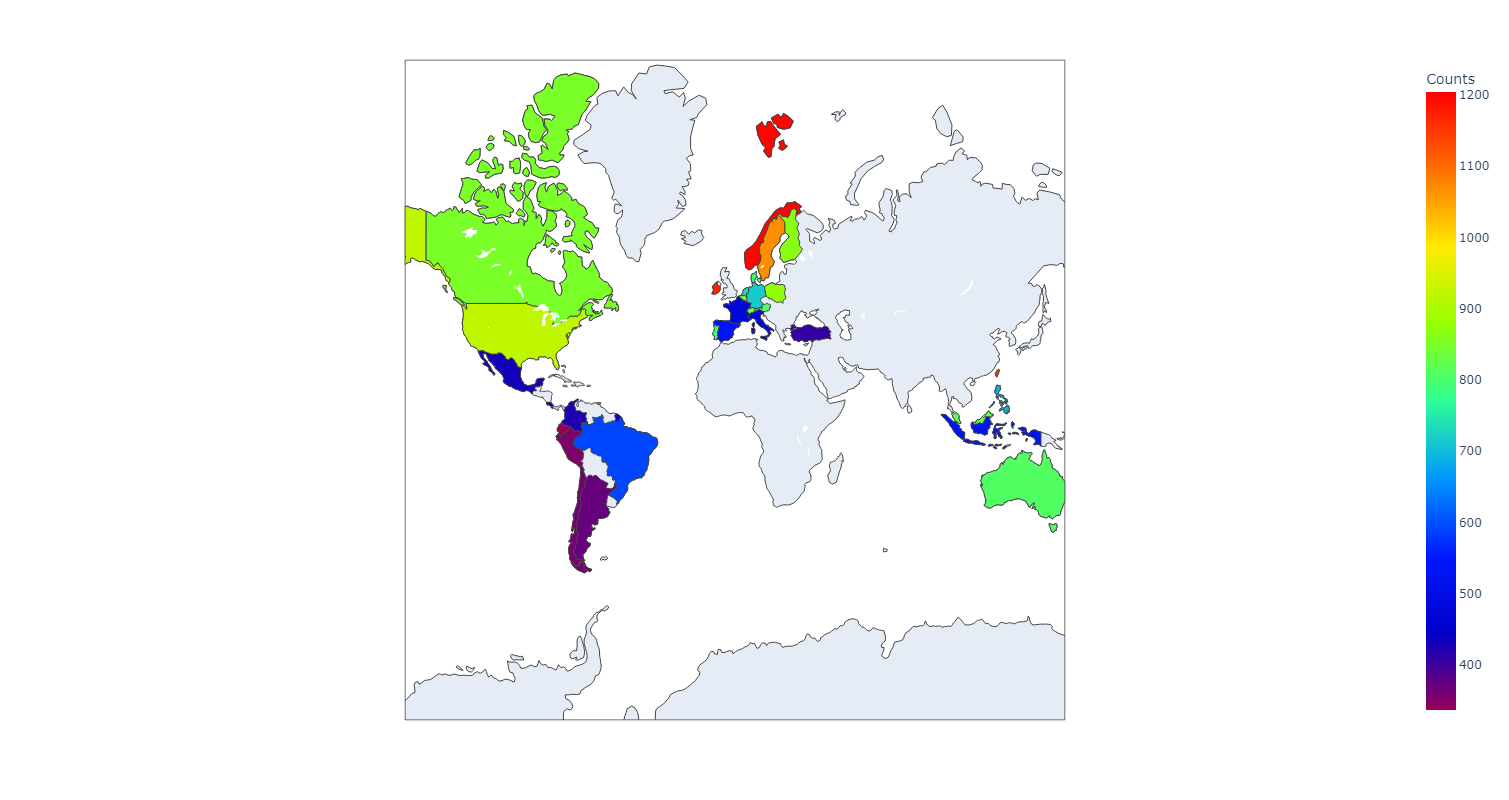

In [77]:
country_list = by_country
fig = px.choropleth(country_list, locations="Country",
                        color="Counts", # lifeExp is a column of gapminder
                        hover_name="Country", # column to add to hover information
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        width=800,
                        height=800,
                        projection = 'mercator')
fig.show()

In [20]:
#df.to_csv('./Orginal_database_from_Kaggle/Final_database_updated.csv')

In [21]:
df_1 = pd.read_csv('./Orginal_database_from_Kaggle/Database to calculate popularity.csv')

In [22]:
df_1['date'] = pd.to_datetime(df_1['date'],format= '%d/%m/%Y') #narzucenie typu daty na dane

In [23]:
df_orginal[df_orginal.Title == 'here comes santa claus'].groupby(['Title','Country'])['Popularity'].sum()

Title                   Country    
here comes santa claus  Australia       81.60
                        Belgium        360.85
                        Canada         487.85
                        Global         184.00
                        Ireland        426.35
                        Netherlands    320.80
                        New Zealand     23.20
                        Norway           1.60
                        Poland         423.20
                        Portugal        68.00
                        Sweden         333.60
                        Switzerland    525.25
                        UK             630.35
                        USA            174.40
Name: Popularity, dtype: float64

In [24]:
df_1[df_1.title == ' Here Comes Santa Claus '].groupby(['title','country'])['position'].sum()

title                     country
 Here Comes Santa Claus   Ireland    578.0
                          UK         714.0
Name: position, dtype: float64

In [25]:
df[df.Artist == 'Ed Sheeran'][['Artist','Title','Artist_followers']]

,Artist,Title,Artist_followers
6245,Ed Sheeran,hearts dont break around here,71783101.0
6246,Ed Sheeran,hearts dont break around here,71783101.0
6247,Ed Sheeran,hearts dont break around here,71783101.0
6248,Ed Sheeran,hearts dont break around here,71783101.0
6249,Ed Sheeran,hearts dont break around here,71783101.0
...,...,...,...
146198,Ed Sheeran,cold coffee,71783101.0
154469,Ed Sheeran,happier - acoustic,71783101.0
154470,Ed Sheeran,happier - acoustic,71783101.0
161413,Ed Sheeran,i dont care - acoustic,71783101.0


In [26]:
by_country = df.groupby(['Artist','Title','Country'])['Release_date'].count().sort_values(ascending=False)
by_country

Artist                  Title                                          Country 
Bobby Helms             jingle bell rock                               Austria     3
The Darkness            christmas time                                 UK          3
Post Malone - Swae Lee  sunflower - spider-man: into the spider-verse  UK          3
                                                                       Turkey      3
Darlene Love            christmas                                      Austria     3
                                                                                  ..
Gorillaz - Kali Uchis   shes my collar                                 Portugal    1
                                                                       Poland      1
                                                                       Ireland     1
                                                                       Global      1
龔詩嘉                     如果你真愛我                                        

### licba utworów w danym kraju

<AxesSubplot:xlabel='Country'>

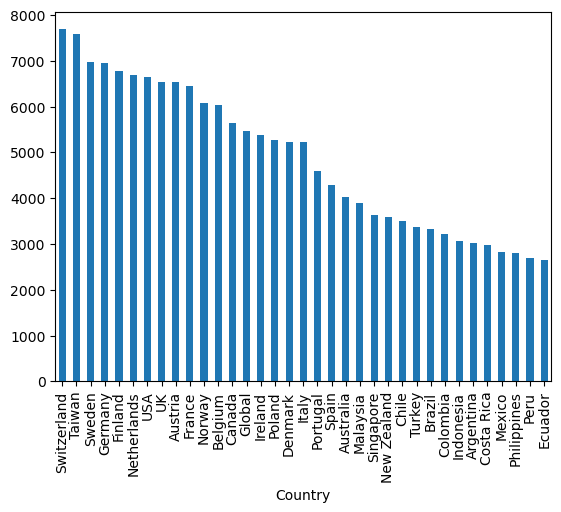

In [27]:
by_country = df.groupby(['Country'])['Title'].count().sort_values(ascending=False) 
by_country.plot(kind = 'bar')


### Średnia popularność w kraju

<AxesSubplot:xlabel='Country'>

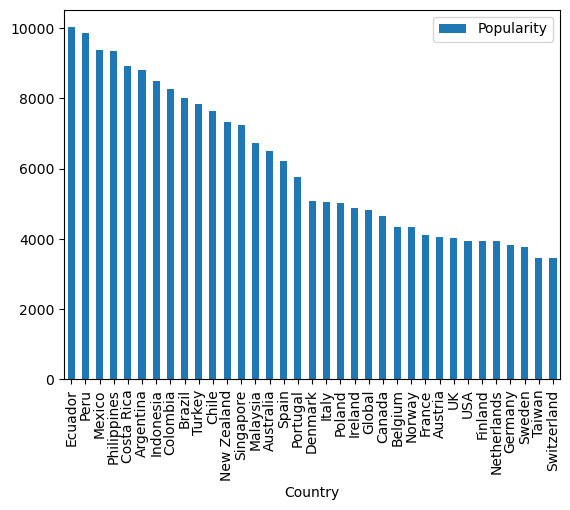

In [28]:
by_country = pd.DataFrame(df.groupby(['Country'])['Popularity'].mean().sort_values(ascending=False)) 
by_country.plot(kind='bar')

### Średnia popularność dla kategori językowej

<AxesSubplot:xlabel='Cluster'>

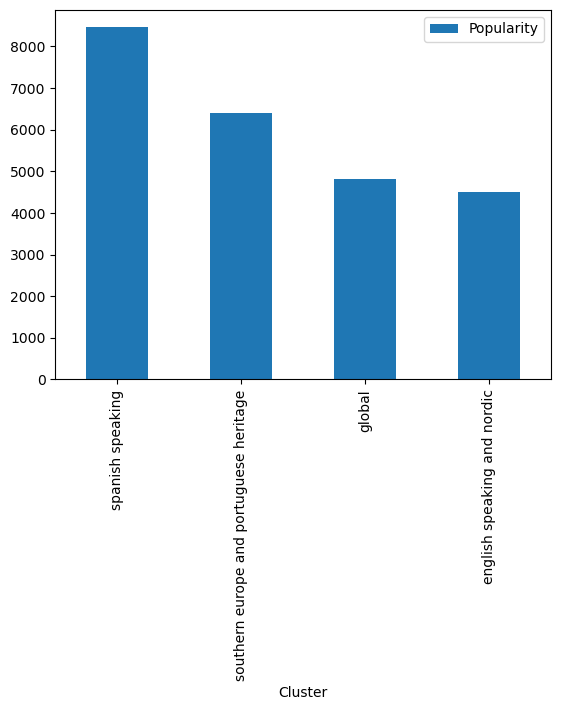

In [29]:
by_country = pd.DataFrame(df.groupby(['Cluster'])['Popularity'].mean().sort_values(ascending=False))
by_country.plot(kind='bar')

In [30]:
country_artist = df[['Country','Artist','Artist_followers']]
ca = country_artist.copy()
ca['Artist'] = ca['Artist'].str.replace('$', '' ,regex=True)


In [31]:
out = ca['Artist'].unique
ca_end = pd.DataFrame(out)
ca_end_i = ca_end.iloc[:,0]
ca_end

ValueError: DataFrame constructor not properly called!

In [32]:
ca_end_1 = ca[ca.index.isin(ca_end_i)]
ca_end_1

NameError: name 'ca_end_i' is not defined

### Cześtość występowania popularnośći

In [91]:
df['Artist_followers'] = df['Artist_followers'].dropna().astype('int')

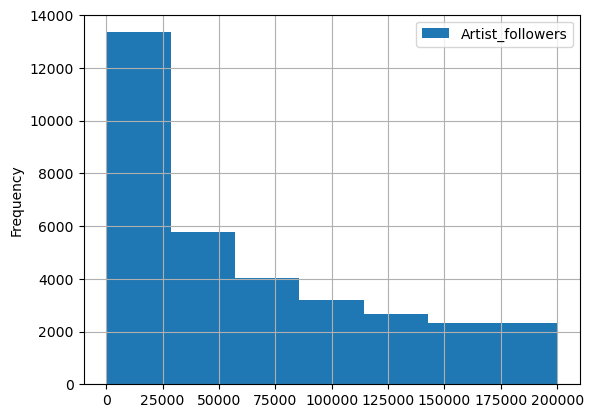

In [99]:
ca[ca.Artist_followers < 200000].plot( kind='hist',grid=True,bins = 7)
pass

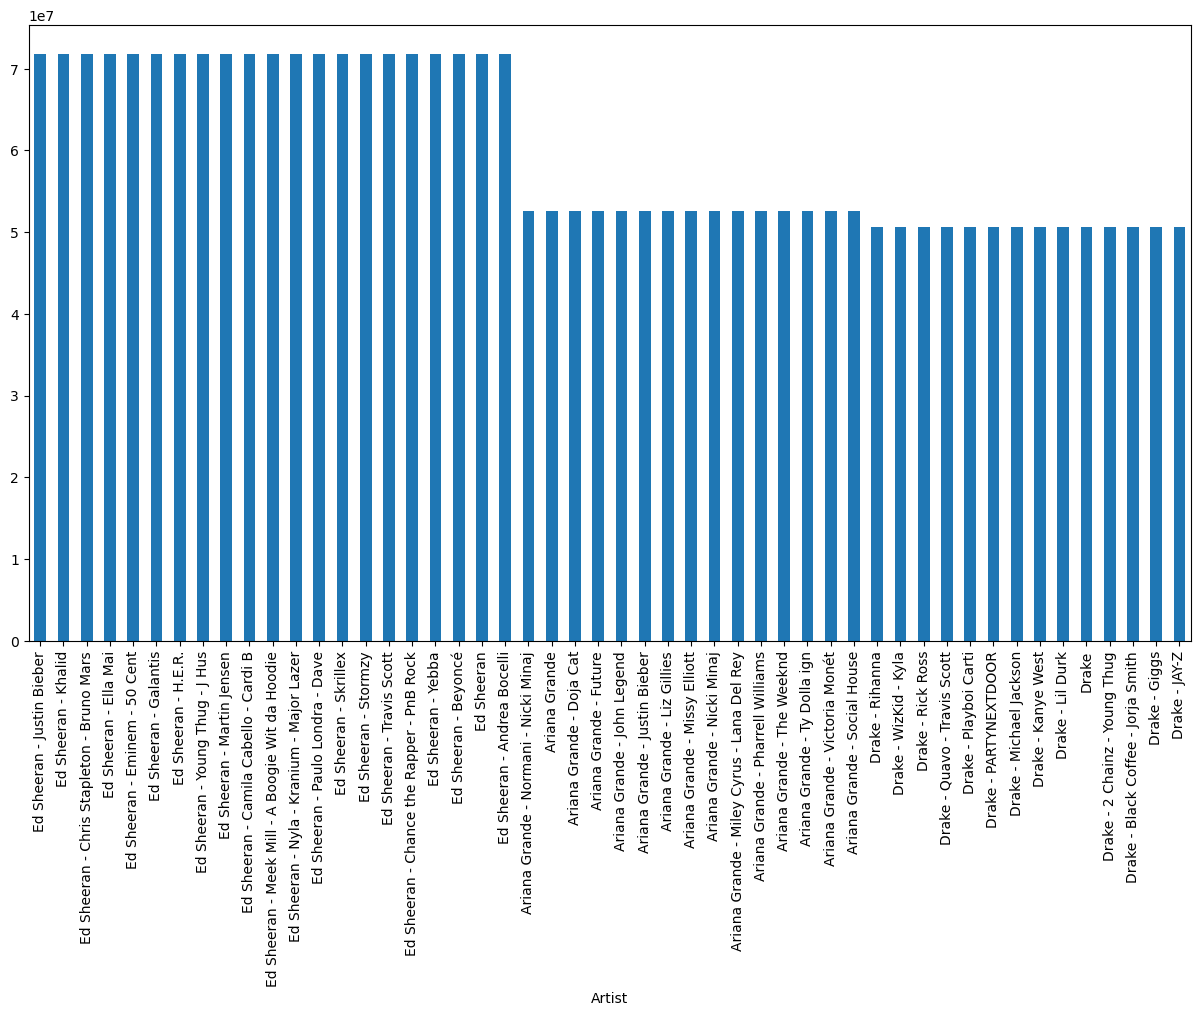

In [34]:
lista_artist = ca[ca.Country == 'Poland'].groupby(['Artist'])['Artist_followers'].mean().sort_values(ascending=False)
lista_artist.head(50).plot(kind='bar', figsize=(15,8));


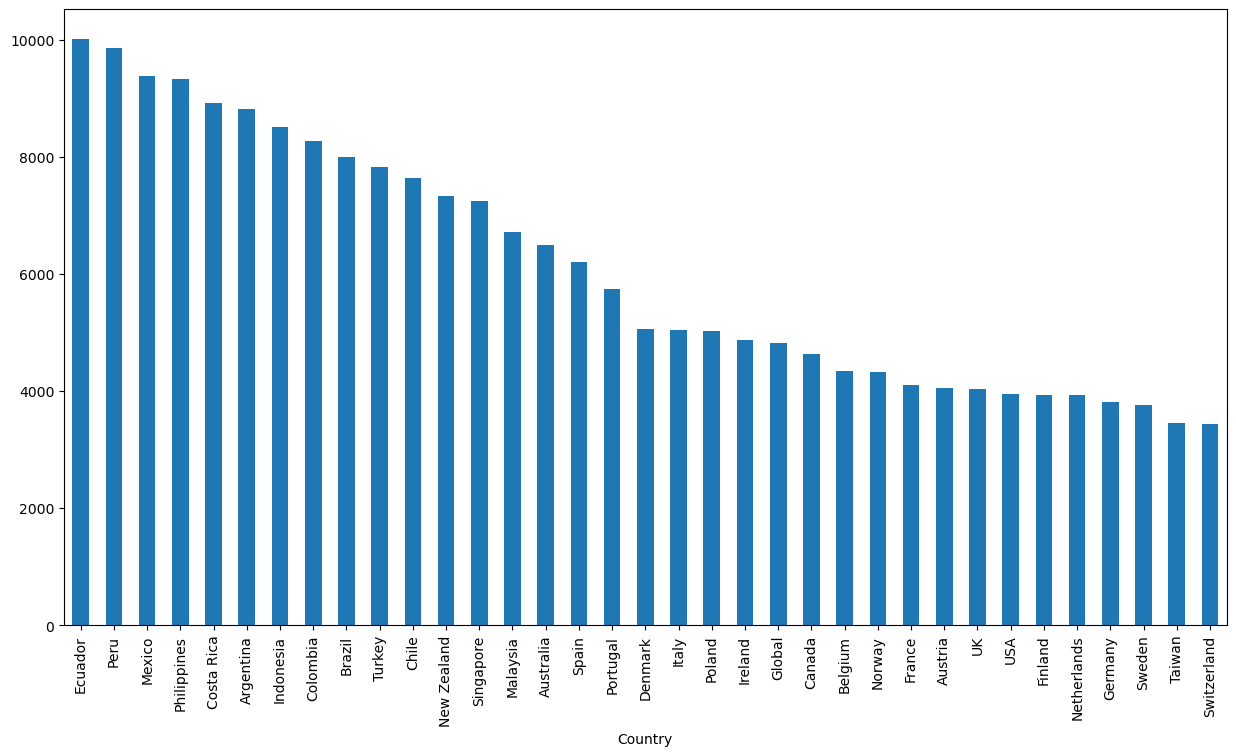

In [35]:
lista_popularity = df_orginal.groupby('Country')['Popularity'].mean().sort_values(ascending=False)
lista_popularity.plot(kind='bar', figsize=(15,8));

In [36]:
lista = df_orginal.groupby('Country')['Popularity'].idxmax()
lista
kraj_song = df_orginal.loc[lista,['Country','Popularity','Title']]

In [37]:
kraj_song.Title.value_counts()

shape of you                22
me rehúso                    4
dance monkey                 2
say you wont let go          2
dan...                       1
shallow                      1
something just like this     1
geceler                      1
sicko mode                   1
Name: Title, dtype: int64

In [38]:
#.iloc[91955,[1,2,13,14,15,16,17,18,19,20,21,22,23,24,25]] #sprawdzanie konkretnego wiersza i kolmun dla niego

In [39]:
#df.info(verbose=True, show_counts=True)
# sprawdzenie kolumn ich typów oraz ilości zliczonych wartości innych niż null

In [40]:
#df.iloc[:,[7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
# stowrzenie fragemtnu całe tabeli na podstawie kolumn z warnigniem dla orginały niżej skomentowane to samo ale juz dla poprawionej 
#df.iloc[:,[8,13,14,15,16,17,18,19,20,21,22,23,24,25]] 

In [41]:
ax = df['Genre'].unique()
ax

array(['argentine hip hop', 'dance pop', 'alternative metal', ...,
       'lo-fi beats', 'instrumental math rock', 'chinese manyao'],
      dtype=object)

In [102]:
lda_topic = df.groupby('LDA_Topic',)['Popularity'].mean().sort_values().reset_index()

In [103]:
lda_topic_country = df.groupby('LDA_Topic')['Artist_followers'].mean().sort_values().reset_index()

Text(0.5, 1.0, 'SUM_Popularity')

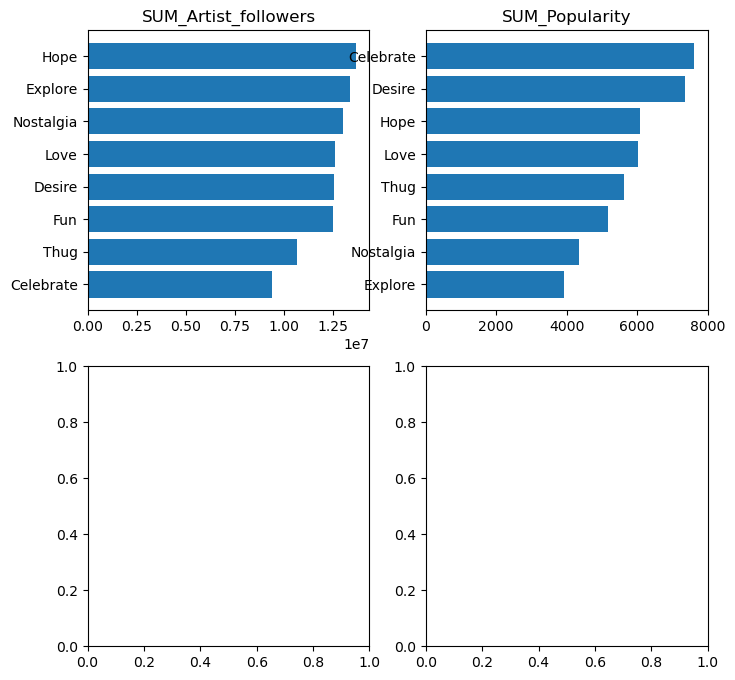

In [106]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0,0].barh(lda_topic_country.LDA_Topic,lda_topic_country.Artist_followers)
ax[0,0].set_title('SUM_Artist_followers')
ax[0,1].barh(lda_topic.LDA_Topic,lda_topic.Popularity)
ax[0,1].set_title('SUM_Popularity')

In [45]:
Genre

NameError: name 'Genre' is not defined

<AxesSubplot:ylabel='Country,LDA_Topic'>

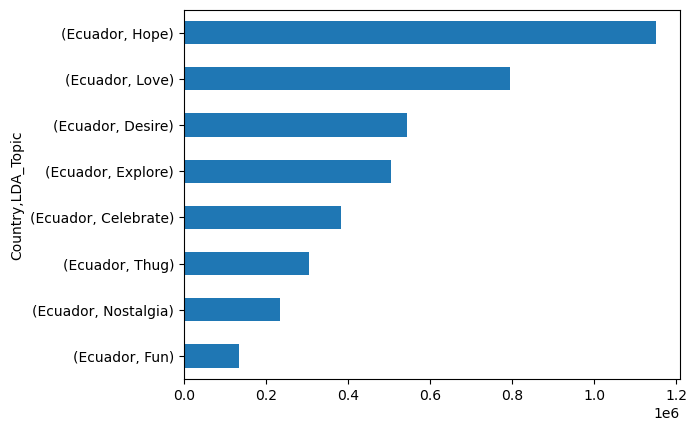

In [46]:
lda_topic = df[df.Country == 'Ecuador'].groupby(['Country','LDA_Topic'])['Popularity'].sum().sort_values(ascending=True)
lda_topic.head(20).plot(kind= 'barh')

<AxesSubplot:ylabel='Country,Genre'>

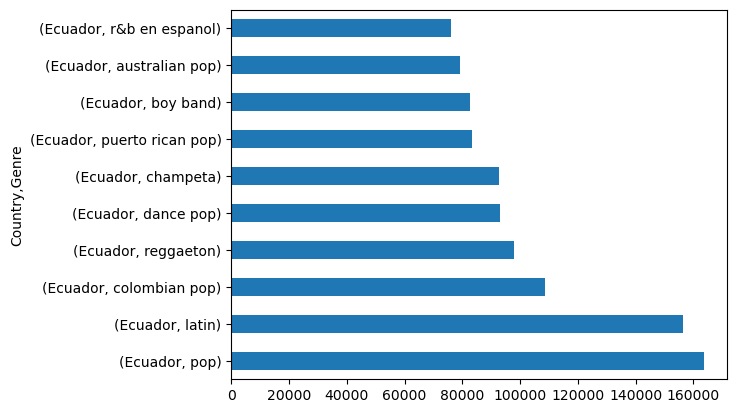

In [47]:
lda_topic_genre = df[df.Country == 'Ecuador'].groupby(['Country','Genre'])['Popularity'].max().sort_values(ascending=False)
lda_topic_genre.head(10).plot(kind= 'barh')

<AxesSubplot:xlabel='Country,Cluster'>

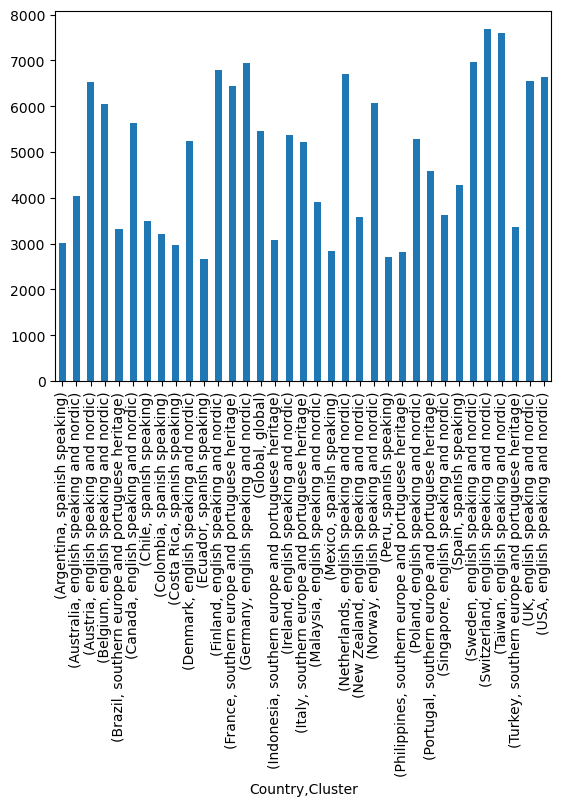

In [48]:
lda_topic = df.groupby(['Country','Cluster'])['Cluster'].count()
lda_topic.plot(kind = 'bar')

<AxesSubplot:ylabel='Country,LDA_Topic'>

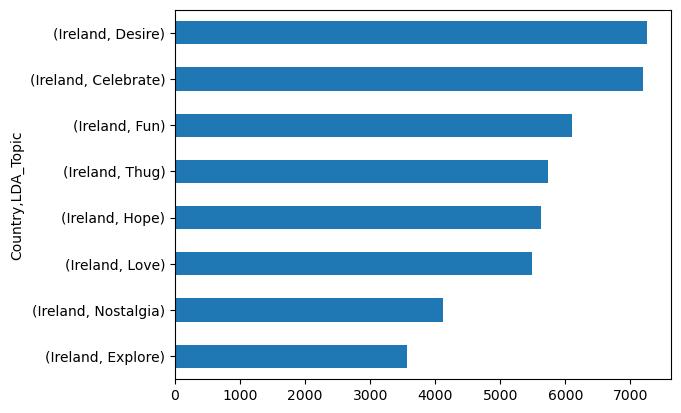

In [49]:
lda_topic = df[df.Country == 'Ireland'].groupby(['Country','LDA_Topic'])['Popularity'].mean().sort_values(ascending=True)
lda_topic.head(20).plot(kind= 'barh')

C:\Users\Data\AppData\Local\Temp\ipykernel_118444\1924626699.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<AxesSubplot:ylabel='Country,Genre'>

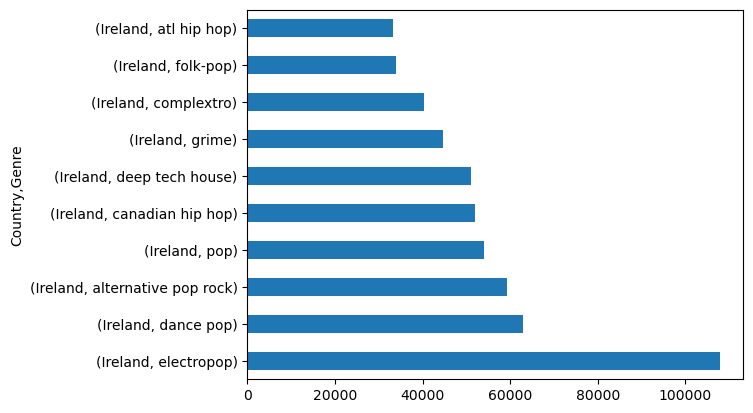

In [50]:
lda_topic_genre = df[df.Country == 'Ireland'][df.LDA_Topic == 'Desire'].groupby(['Country','Genre'])['Popularity'].max().sort_values(ascending=False)
lda_topic_genre.head(10).plot(kind= 'barh')

In [51]:
df[df.Cluster == 'english speaking and nordic'].loc[:,'Country'].unique()

array(['USA', 'Belgium', 'Switzerland', 'Germany', 'Taiwan', 'UK',
       'Austria', 'Australia', 'Canada', 'Finland', 'Ireland', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Poland', 'Sweden',
       'Singapore', 'Denmark'], dtype=object)

<AxesSubplot:ylabel='Country,LDA_Topic'>

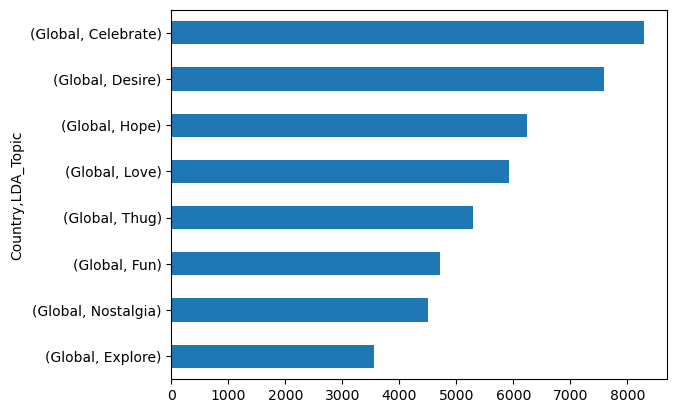

In [52]:
lda_topic = df[df.Country == 'Global'].groupby(['Country','LDA_Topic'])['Popularity'].mean().sort_values(ascending=True)
lda_topic.head(20).plot(kind= 'barh')

C:\Users\Data\AppData\Local\Temp\ipykernel_118444\230727917.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<AxesSubplot:ylabel='Country,Genre'>

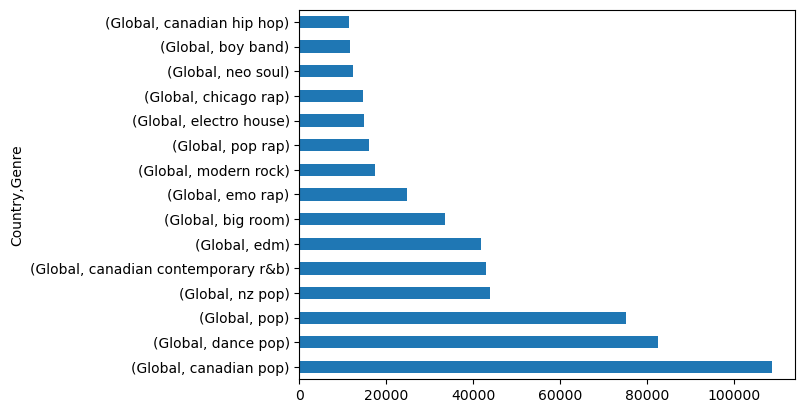

In [53]:
lda_topic_genre = df[df.Country == 'Global'][df.LDA_Topic == 'Celebrate'].groupby(['Country','Genre'])['Popularity'].max().sort_values(ascending=False)
lda_topic_genre.head(15).plot(kind= 'barh')

<AxesSubplot:ylabel='Country,LDA_Topic'>

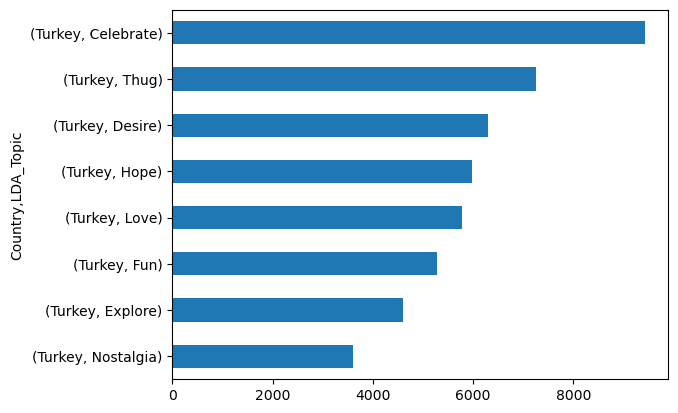

In [54]:
lda_topic = df[df.Country == 'Turkey'].groupby(['Country','LDA_Topic'])['Popularity'].mean().sort_values(ascending=True)
lda_topic.head(20).plot(kind= 'barh')

C:\Users\Data\AppData\Local\Temp\ipykernel_118444\1617778945.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<AxesSubplot:ylabel='Country,Genre'>

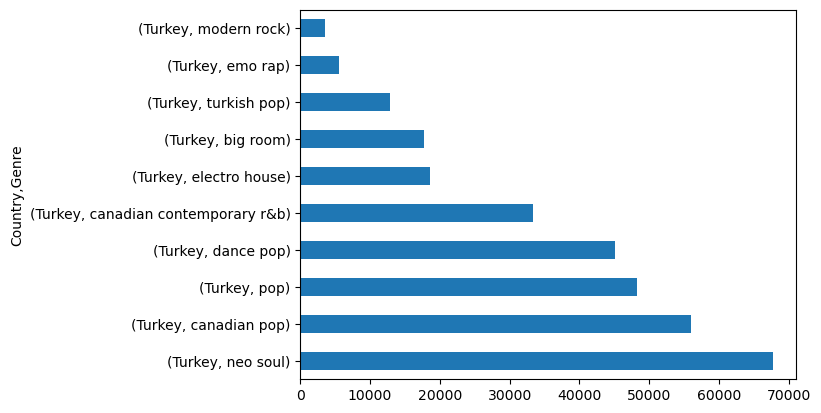

In [55]:
lda_topic_genre = df[df.Country == 'Turkey'][df.LDA_Topic == 'Celebrate'].groupby(['Country','Genre'])['Popularity'].max().sort_values(ascending=False)
lda_topic_genre.head(10).plot(kind= 'barh')

In [56]:
sns.relplot(data=df_3 ,x='Country', y='Artist_followers', hue='Cluster')

NameError: name 'df_3' is not defined

In [57]:
df_3 = df[['Country','Cluster','Popularity']].sort_values(by= ['Cluster'])

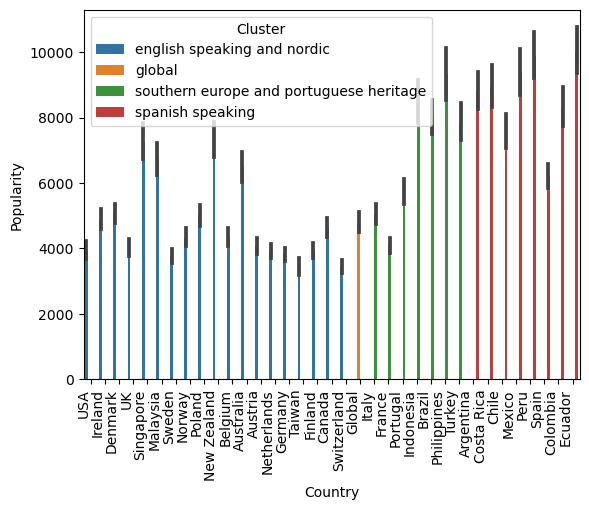

In [58]:
#g = sns.scatterplot(data=df_3, x="Country", y="Popularity", hue="Cluster",)
g = sns.barplot(data=df_3, x="Country", y="Popularity", hue="Cluster",)
g.set_xticklabels(g.get_xticklabels(), rotation=90,
                        horizontalalignment='right')
pass

In [64]:
# Wybór kraju wprowadzonego przez użytkownika
wprowadzony_gatunek = input("Wprowadź nazwę gatunku muzycznego, dla którego chcesz zobaczyć top 10 krajów: ")

Wprowadź nazwę gatunku muzycznego, dla którego chcesz zobaczyć top 10 krajów:  dance pop


In [78]:
nowy_df

,Genre,Country,iso_alpha
16,dance pop,Global,Global
17,dance pop,USA,USA
18,dance pop,UK,UK
19,dance pop,Austria,AUT
20,dance pop,Australia,AUS
...,...,...,...
170526,dance pop,Taiwan,TWN
170539,dance pop,Taiwan,TWN
170552,dance pop,Taiwan,TWN
170571,dance pop,Taiwan,TWN


In [65]:
# Wybór tylko danych dotyczących wybranego kraju i gatunku muzycznego
nowy_df = df.loc[df['Genre'] == wprowadzony_gatunek, ['Genre', 'Country','iso_alpha']]

In [66]:
# Grupowanie po kraju i gatunku muzycznym, a następnie obliczanie liczby wystąpień

zliczanie = nowy_df['iso_alpha'].value_counts() #zlicza nam ile jest wystąpień danego kraju
zliczanie.columns = ['Country', 'Counts','iso_alpha'] #zmienia nazwe kolumn na country i counts 

In [75]:
by_country = nowy_df['iso_alpha'].value_counts().reset_index().rename(columns={'iso_alpha': 'Counts', 'index': 'Country'})

In [76]:
by_country

,Country,Counts
0,UK,1204
1,NOR,1199
2,IRL,1172
3,TWN,1143
4,SWE,1068
5,USA,919
6,Global,909
7,POL,873
8,FIN,865
9,BEL,859
